In [27]:
# 必要モジュールのインポート
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [33]:
# データを準備する
np.random.seed(20190414) # シードの設定(再現性の確保)  

n_samples, n_features = 50, 200 # データ数:50, 特徴量数 : 200
X = np.random.randn(n_samples, n_features) # 正規分布に従った乱数生成
# 正解のモデルとなる係数(これも乱数で生成)
coef = 3 * np.random.randn(n_features) 
inds = np.arange(n_features)  
#  スパース性を作るために一部の係数を0に
coef[inds[10:]] = 0 
np.random.shuffle(inds) # indsの中身をシャッフル

In [34]:
y = np.dot(X, coef) # 教師データの作成
# 正規分布の乱数でノイズを加える
y += 0.01 * np.random.normal(size=n_samples) 

In [35]:
n_samples = X.shape[0] 
# 半々のデータに分ける
X_train, y_train = X[:n_samples //2], y[:n_samples//2]
X_test, y_test = X[n_samples//2:], y[n_samples//2:]

In [36]:
# Lassoを使って予測
from sklearn.linear_model import Lasso
# モデルの生成
alpha = 0.1 
lasso =Lasso(alpha=alpha)
# フィッティングと予測
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print(lasso)
print("---------------------------")
print("r^2 on test data: %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
---------------------------
r^2 on test data: 0.715573


In [37]:
# 次はElasticNet  
from sklearn.linear_model import ElasticNet  
# モデルの生成
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

# フィッティングと予測
enet.fit(X_train, y_train) 
y_pred_enet = enet.predict(X_test)  
r2_score_enet = r2_score(y_test, y_pred_enet)  
print(enet)
print("---------------------------")
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
---------------------------
r^2 on test data : 0.641836


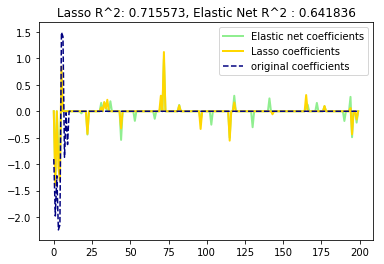

In [39]:
# ElasticNetで予測された係数の値
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
# Lassoで予測された係数の値
plt.plot(lasso.coef_, color='gold', linewidth=2,
        label='Lasso coefficients')
# 正解データ  
plt.plot(coef, '--', color='navy', label='original coefficients')  
# 凡例の表示  
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2 : %f" 
          % (r2_score_lasso, r2_score_enet))
plt.savefig('coefficient_plotting.png')
plt.show()